In [58]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

%matplotlib inline

In [14]:
with open('ethHist.json') as json_data:
    d = json.load(json_data)

Note this data is the ethereum price with respect to bitcoin. It was the data I had on hand for a quick analysis, we could pull a more in depth history, look at price moves against fiat and do similar analysis

In [25]:
df = json_normalize(d).sort_values("date").reset_index()

In [26]:
df.head()

,index,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,0,0.004555,1439006400,0.330000,0.004500,0.330000,54434.780924,329.649378,0.006056
1,1,0.005350,1439020800,0.005488,0.004225,0.005278,62325.494919,304.983198,0.004893
2,2,0.004621,1439035200,0.005840,0.004324,0.005101,30462.689907,145.251297,0.004768
3,3,0.003070,1439049600,0.004770,0.002620,0.004621,74319.505974,272.400189,0.003665
4,4,0.003125,1439064000,0.003870,0.002900,0.003070,44663.608672,153.519259,0.003437


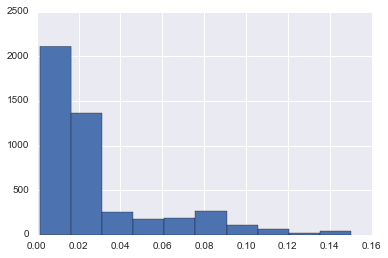

In [27]:
df.close.hist()

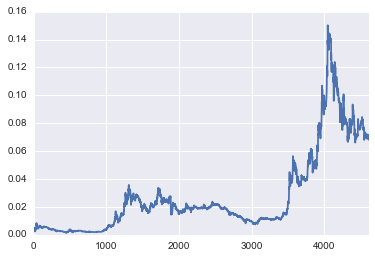

In [28]:
df.close.plot()

Our interest is in the sliding time window price moves.

In [51]:
#periods of interest
horizon = 10

def delta(i,h):
    if i>=h:
        return (df.loc[i, "close"]-df.loc[i-h, "close"])/df.loc[i-h, "close"]
    else:
        return np.nan

for h in range(1,horizon+1):
    df["delta"+str(h)] = df['index'].apply(lambda i: delta(i,h))

In [52]:
deltas = df[df.columns[-10:]].dropna()

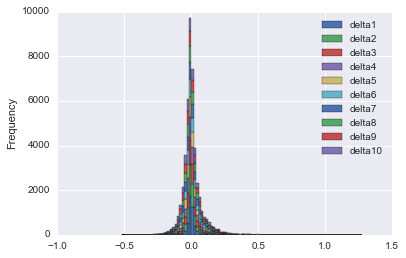

In [75]:
deltas.plot.hist(bins = 100, stacked=True)

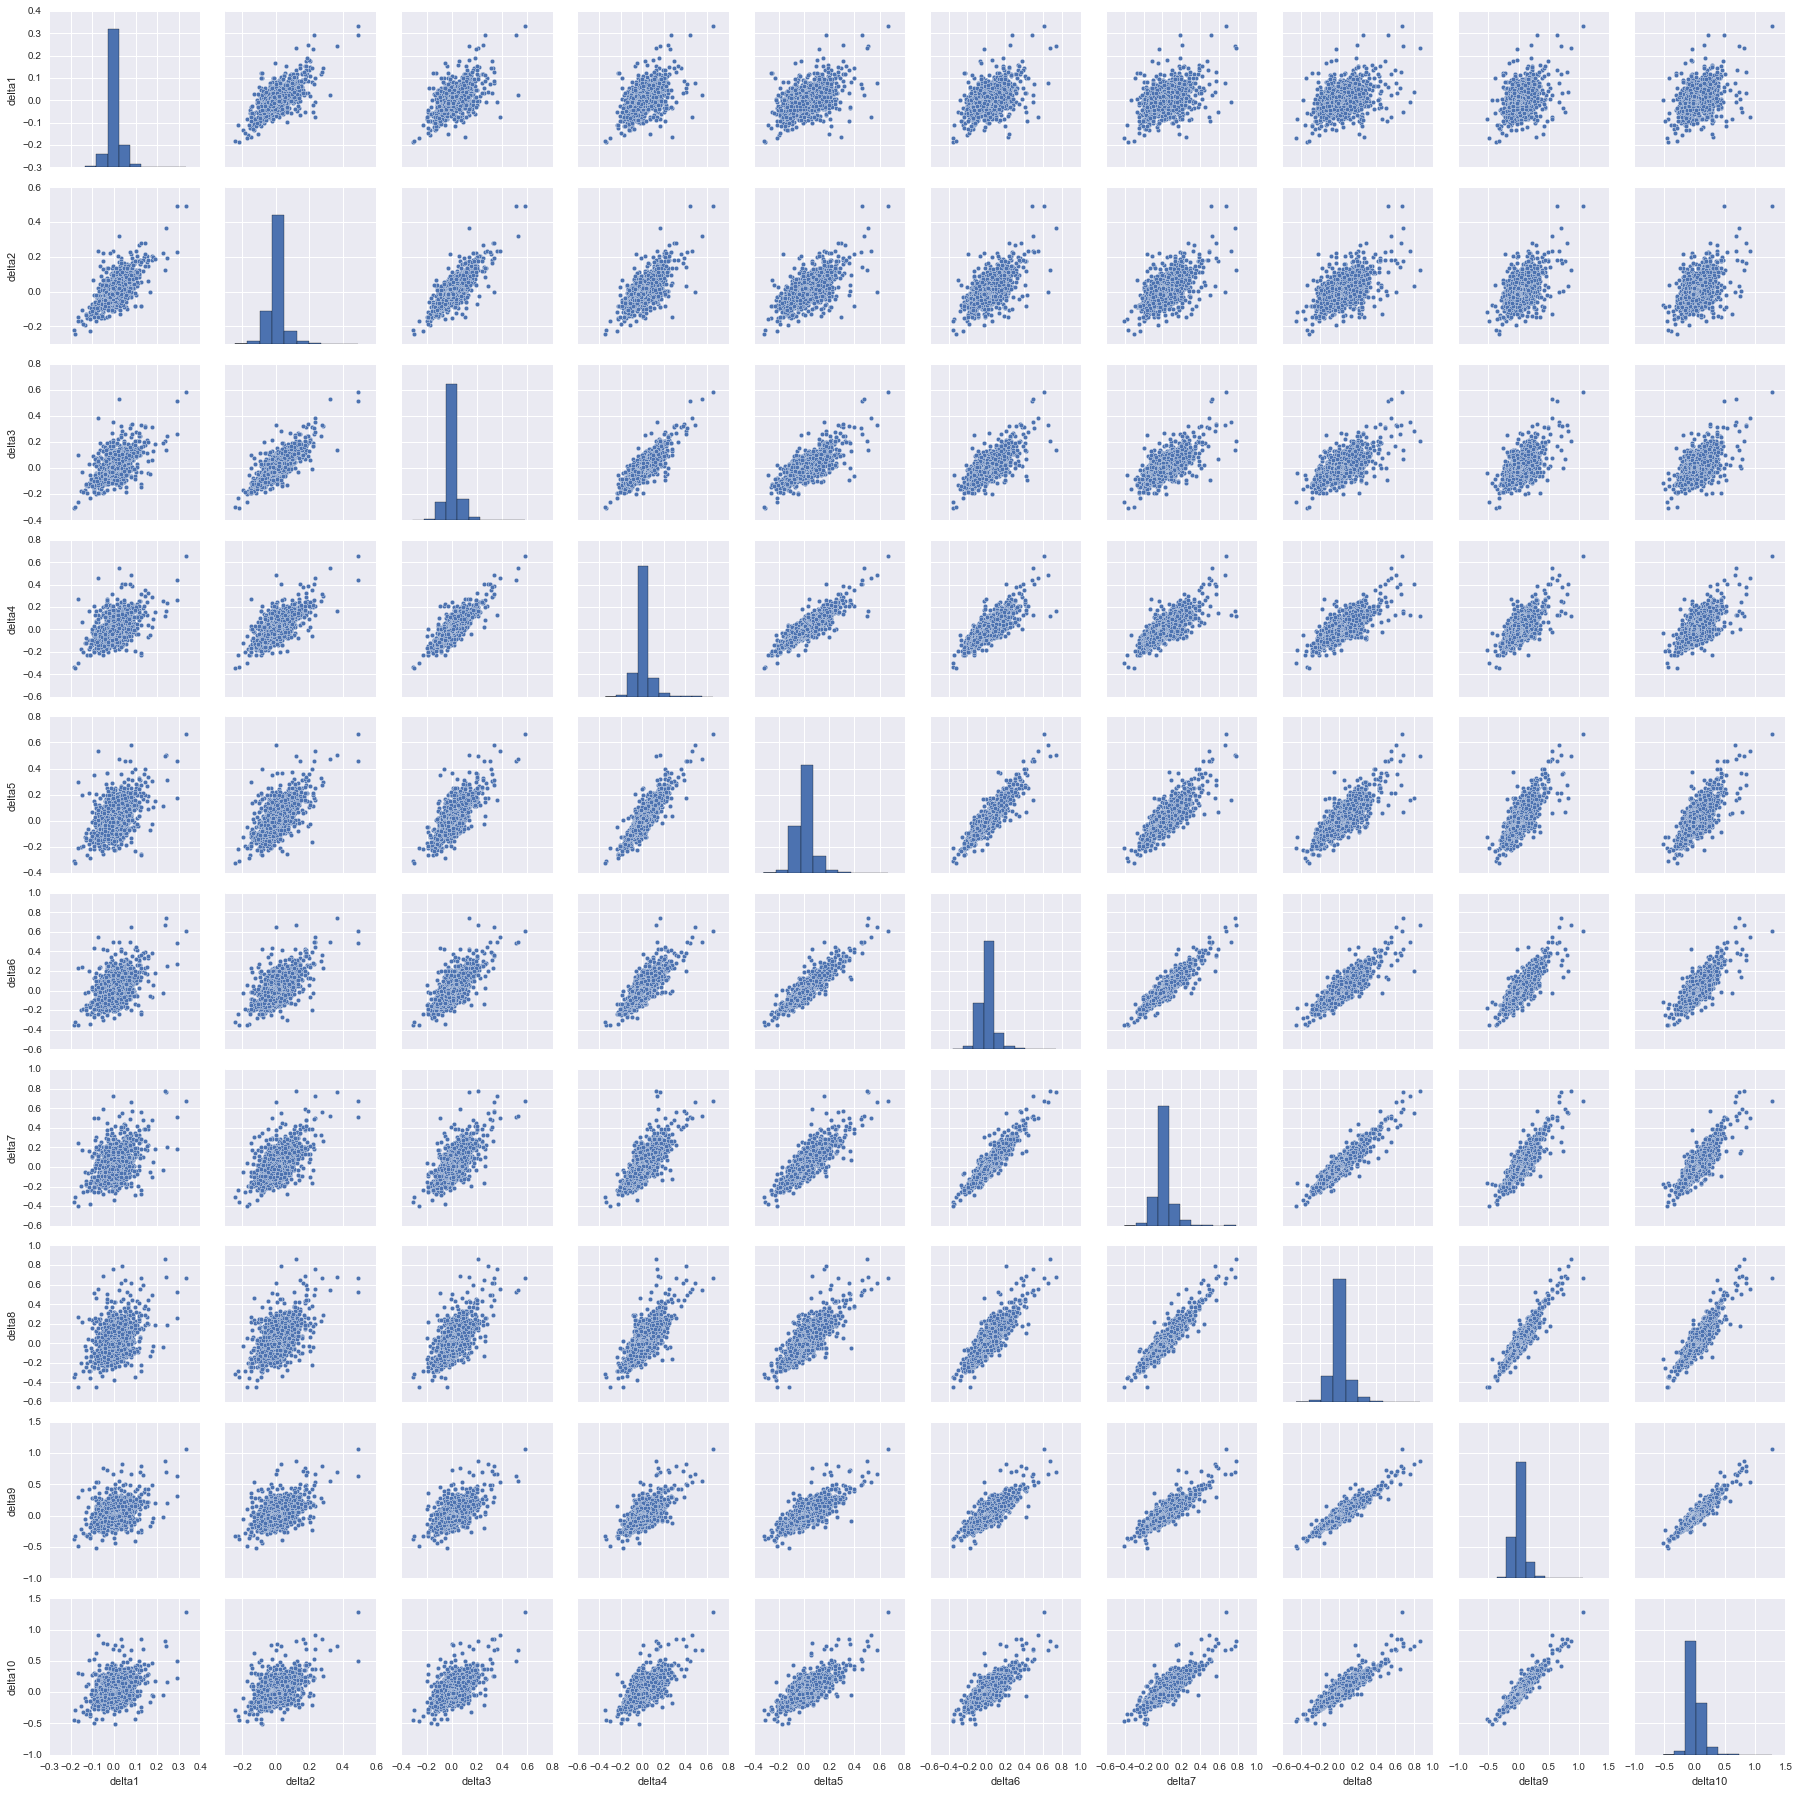

In [53]:
sns.pairplot(deltas)

In [79]:
def parser(s):
    try:
        return int(s[-2:])
    except:
        return int(s[-1])

stats = pd.melt(deltas)
stats.columns = ["horizon", "percent_change"]

stats["horizon"]= stats["horizon"].apply(parser)

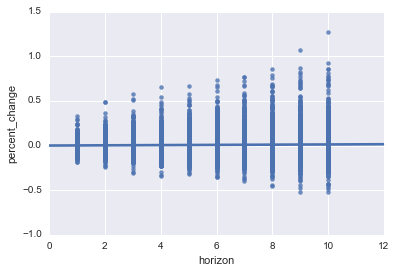

In [80]:
sns.regplot("horizon","percent_change", stats)

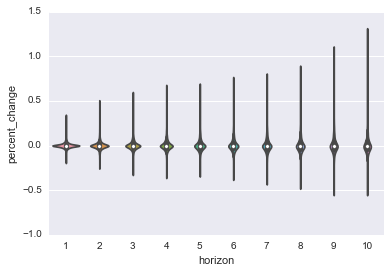

In [84]:
sns.violinplot(x="horizon",y="percent_change", data=stats)

In short the volitality against BTC is actually pretty small... unfortunately when comparing against fiat, this is may be compounded significantly because BTC is volatile against fiat. None the less its a starting point and one could reuse this analysis to consider the volatility against fiat if the necessary data were added.